### EDA and Feature Engineering of Google Dataset
1. Problem statement: Today 1.85 million different apps are available for users to downloa. Android users have even more from which to choose, with 1.56 million available through google the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our objective is to find the most popular Category, find the App with largest number of installs, the app with largest size etc.

2. Data Collection: Data consists of 20 columns and 10841 rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.shape

(10841, 13)

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
df[df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


#### Observation :
The Dataset has missing Values.

In [8]:
## Lets handle reviews column
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [9]:
df['Reviews'].str.isnumeric().sum()

np.int64(10840)

In [10]:
# There is one row in the Reviews column that has nonnumeric value '3M'
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
## Lets make copy of DataFrame so we don't delete the original dataset
df_copy = df.copy()

In [12]:
# Delete the non numeric row of Reviews
df_copy=df_copy.drop(df_copy.index[10472])

In [13]:
# check: There is no non numeric value anymore
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [14]:
# Now convert 'Reviews' datatype to int
df_copy['Reviews'] = df_copy['Reviews'].astype(int)

In [15]:
# check
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [16]:
## Lets handle 'Size' Column
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [17]:
# So the column has values with 'M', 'k' and also a single string value 'Varies with device'
df_copy['Size'] = df_copy['Size'].str.replace('M', '000')
df_copy['Size'] = df_copy['Size'].str.replace('k', '')
df_copy['Size'] = df_copy['Size'].replace('Varies with device', np.nan)
df_copy['Size'] = df_copy['Size'].astype(float)

In [18]:
df_copy['Size'].isnull().sum()

np.int64(1695)

In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [20]:
## Lets handle 'Installs'
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [21]:
df_copy['Installs'] = df_copy['Installs'].str.replace(',', '')
df_copy['Installs'] = df_copy['Installs'].str.replace('+', '')
df_copy['Installs'] = df_copy['Installs'].astype(int)

In [22]:
df_copy['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


In [24]:
## Let's handle Price
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [25]:
df_copy['Price'] = df_copy['Price'].str.replace('$', '')
df_copy['Price'] = df_copy['Price'].astype(float)

In [26]:
df_copy["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [28]:
## Lets handle 'Last Updated'
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1377,), dtype=object)

In [29]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])

In [30]:
df_copy['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [31]:
df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year

In [32]:
## Delete the 'Last Updated' column as we don't need it anymore
df_copy.drop('Last Updated', axis=1, inplace=True)

In [33]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [34]:
df_copy.to_csv('data/google_cleaned_csv')

### Exploratory Data Analysis (EDA)

In [35]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [36]:
df_copy[df_copy.duplicated('App')].shape

(1181, 15)

## Observation 
The dataset has duplicate values

In [37]:
df_copy.drop_duplicates(subset=['App'], keep='first', inplace=True)

In [38]:
df_copy[df_copy.duplicated('App')].shape

(0, 15)

In [39]:
## Explore
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

## print 
print(f'We have {len(numerical_features)} numerical features: {numerical_features}')
print(f'We have {len(categorical_features)} categorical features: {categorical_features}')

We have 8 numerical features: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']
We have 7 categorical features: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [40]:
## Proportion of count data on categorical columns
for col in categorical_features:
    print(df_copy[col].value_counts(normalize=True)*100)
    print("__________________________________________")

App
Photo Editor & Candy Camera & Grid & ScrapBook        0.010353
Coloring book moana                                   0.010353
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010353
Sketch - Draw & Paint                                 0.010353
Pixel Draw - Number Art Coloring Book                 0.010353
                                                        ...   
Sya9a Maroc - FR                                      0.010353
Fr. Mike Schmitz Audio Teachings                      0.010353
Parkinson Exercices FR                                0.010353
The SCP Foundation DB fr nn5n                         0.010353
iHoroscope - 2018 Daily Horoscope & Astrology         0.010353
Name: proportion, Length: 9659, dtype: float64
__________________________________________
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUC

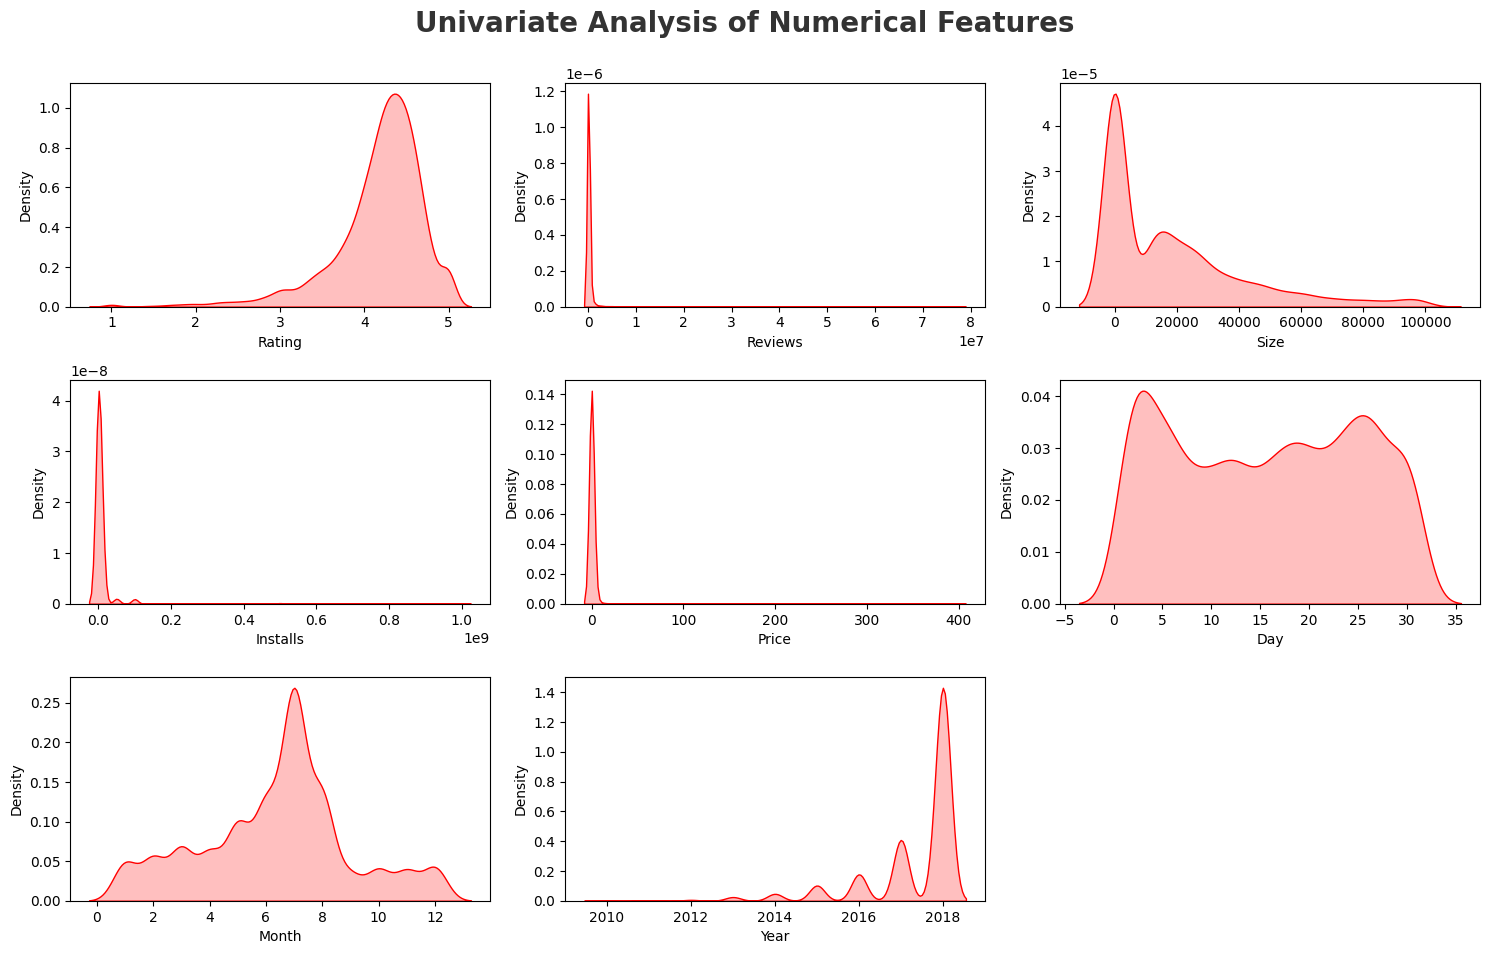

In [41]:
## To analyze numerical columns we use kdeplot
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize =20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5,3, i+1)
    sns.kdeplot(x=df_copy[numerical_features[i]], fill=True, color='r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()
plt.show()

### Observation :
We have Reviews, Installs, and Price which are left skewed and Rating, Size, and Year which are right skewed.

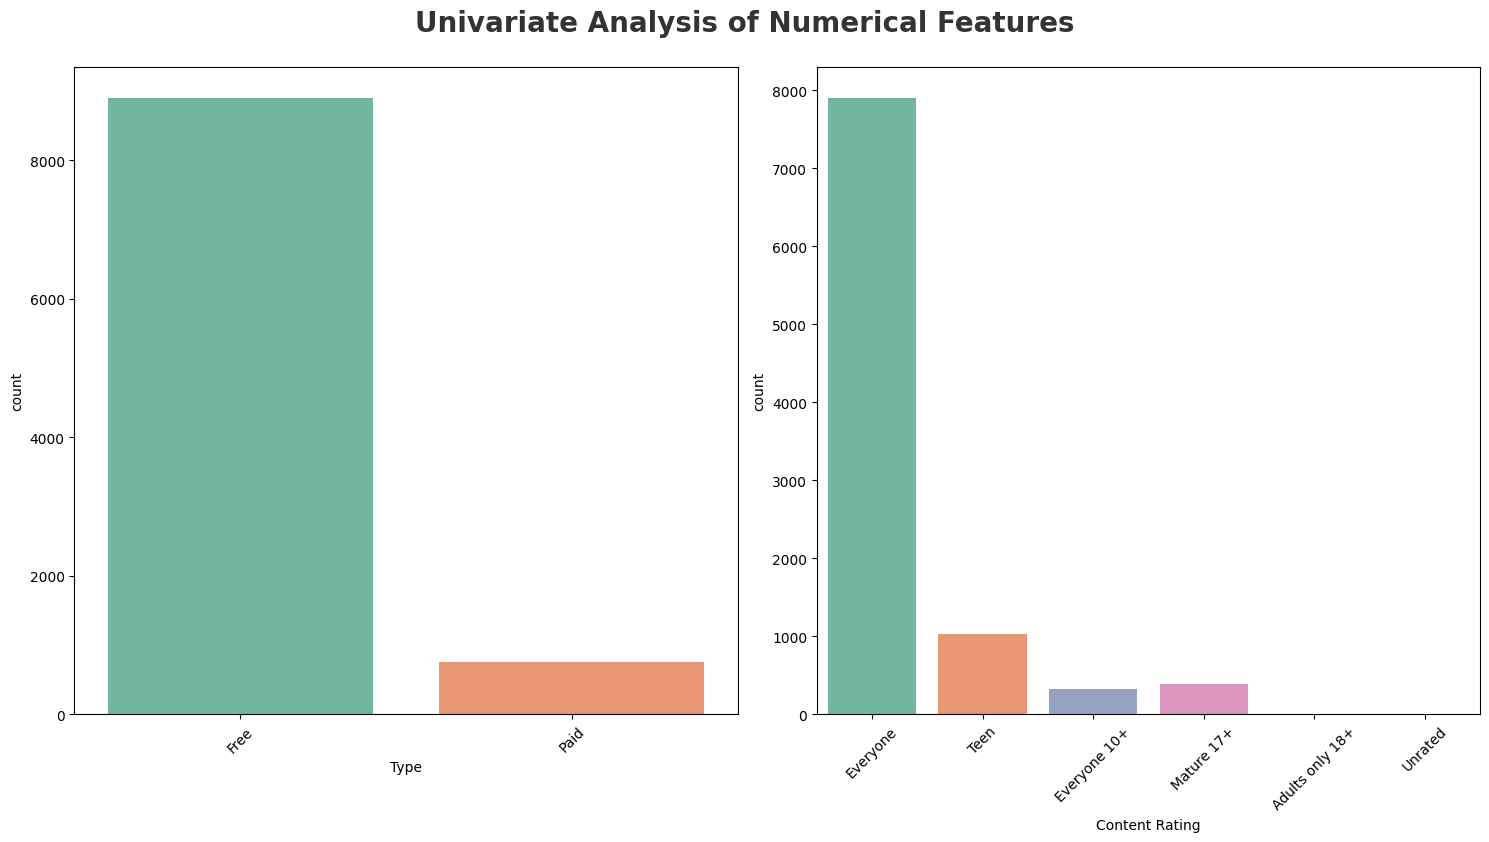

In [42]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize =20, fontweight='bold', alpha=0.8, y=1.)
category = ['Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2,2, i+1)
    sns.countplot(x=df_copy[category[i]], palette='Set2')
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

Which is the most popular app category?

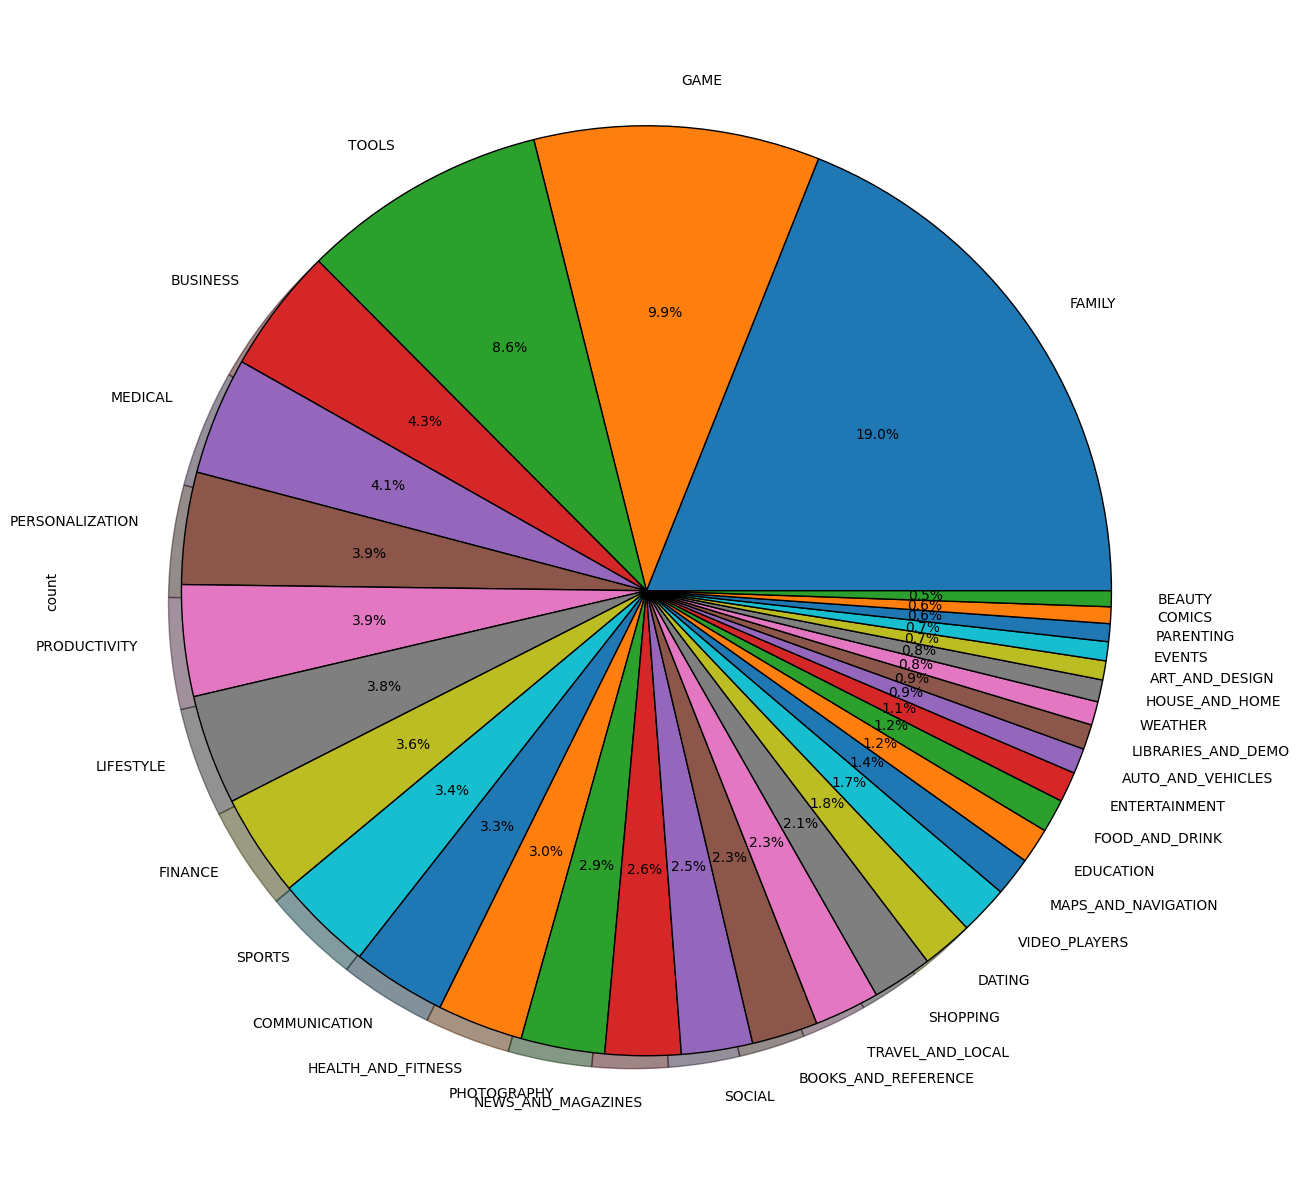

In [51]:
df_copy['Category'].value_counts().plot.pie(y=df['Category'],shadow=True, wedgeprops={'edgecolor':'black', 'linewidth':1}, autopct='%1.1f%%', figsize=(15, 16))
plt.show()

### Observation
There are three major categories in terms of popularity first being 'family' followed by 'game' and 'tools'

In [54]:
# What are the top 10 App categories 
category = pd.DataFrame(df_copy['Category'].value_counts())
category.rename(columns={'Category':'Count'}, inplace=True)
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


<Figure size 1500x600 with 0 Axes>

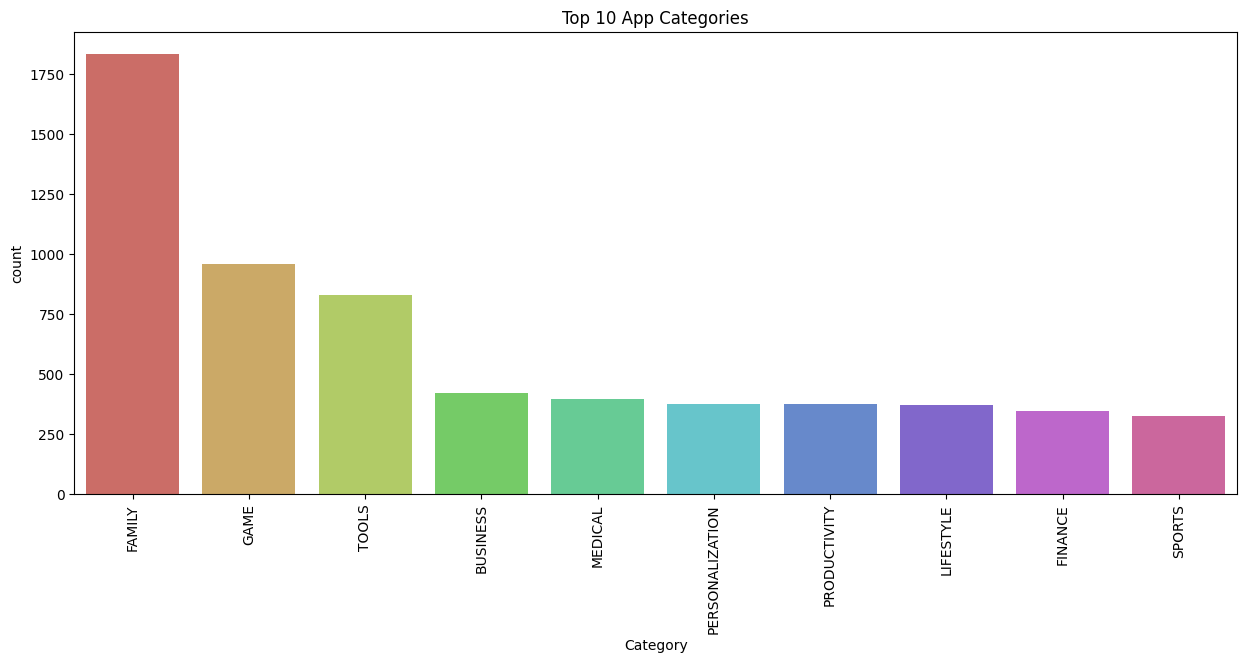

In [56]:
plt.figure(figsize=(15, 6))
sns.barplot(x=category.index[:10], y='count', data=category[:10], palette='hls')
plt.title('Top 10 App Categories')
plt.xticks(rotation=90)
plt.show()

## Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by games category which has 11% f the apps.

2. Least number of apps belong to the Beauty categoty with less that 1% of the total apps belonging to it.